In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# 1. Моделювання та розв’язання задачі лінійного програмування:
    #При виготовленні продукції двох видів П1 і П2 використовується 4 типа
    #сировини: С1, С2, С3 і С4, умовні одиниці записів яких та норми їх
    #споживання для випуску одиниці продукції приведені у таблиці. Прибуток
    #від реалізації одиниці П1 дорівнює 7 ум. од., а П2 – 5 ум. од. Скласти такий
    #план випуску продукції, який забезпечує max прибутку від її реалізації.

| Вигляд продукції | П1 | П2 | Запас сировини |
| --- | --- | --- | --- |
| С1 | 2 | 8 | 9 |
| С2 | 2 | 1 | 13 |
| С3 | 0 | 3 | 15 |
| С4 | 3 | 0 | 18 |
| Здобуток | 7 | 5 |  |




In [4]:

def z(x1):
    return (12-7*x1)/5

def a1(x1):
    return (19-2*x1)/8

def a2(x1):
    return (13-2*x1)

def a3(x1):
    return 5

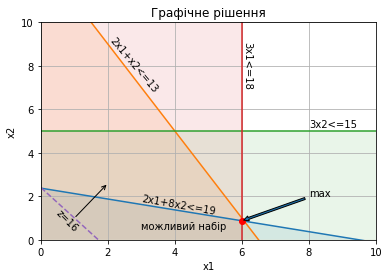

In [17]:
x1 = np.arange(0, 30, 0.1)
y = np.array(np.random.randint(0,20,(25,)))
plt.axis([0,10,0,10])
plt.grid(True)
plt.plot(x1,a1(x1))
plt.fill_between(x1,a1(x1), alpha=0.1)
plt.plot(x1,a2(x1))
plt.fill_between(x1,a2(x1), alpha=0.1)
plt.plot([0,20],[5,5])
plt.fill_between([0,20],[5,5], alpha=0.1)
plt.plot([6,6],[0,20])
plt.fill_betweenx([0,20], [6,6], alpha=0.1)
plt.plot(x1, z(x1),'--')
plt.plot(6,0.875,'ro')
plt.annotate('max',xy=(6,0.875),xytext=(8,2),arrowprops=dict(arrowstyle='simple'))
plt.annotate('', xy=(2,z(2)+3),xytext=(1,z(1)), arrowprops=dict(arrowstyle='->'))
plt.text(3,0.5,"можливий набір")
plt.text(3,1.2,'2x1+8x2<=19', rotation=-10)
plt.text(2,6.8,'2x1+x2<=13', rotation=-50)
plt.text(8,5.2,'3x2<=15', rotation=0)
plt.text(6,7,'3x1<=18', rotation=-90)
plt.text(0.4,0.4,'z=16', rotation=-45)
plt.title('Графічне рішення')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [6]:
from scipy.optimize import linprog

In [7]:
import time

In [8]:
c=[-7,-5]
aub=[[2,8],[2,1],[0,3],[3,0]]
bub=[19,13,15,18]
x1b=(0,None)
x2b=(0,None)
%time res = linprog(c, A_ub=aub, b_ub=bub, bounds=[x1b, x2b], method='revised simplex')

CPU times: user 1.63 ms, sys: 7.47 ms, total: 9.09 ms
Wall time: 12.5 ms


In [23]:
print("SciPy solution: ")
print(res)
print("Optimal value: ", -res.fun)

SciPy solution: 
     con: array([], dtype=float64)
     fun: -46.375
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.   ,  0.125, 12.375,  0.   ])
  status: 0
 success: True
       x: array([6.   , 0.875])
Optimal value:  46.375


In [21]:
import pulp
x1 = pulp.LpVariable("x1",0)
x2 = pulp.LpVariable("x2",0)
problem = pulp.LpProblem("Problem", pulp.LpMaximize)
problem += 7*x1 + 5*x2, "obj func"
problem += 2*x1 + 8*x2 <= 19
problem += 2*x1 + x2 <= 13
problem += 3*x2 <= 15
problem += 3*x1 <= 18
%time status = problem.solve()

CPU times: user 6.39 ms, sys: 3.53 ms, total: 9.91 ms
Wall time: 19 ms


In [22]:
print("PuLP solution: ")
for var in problem.variables():
    print(var.name, "=", var.varValue)
print(pulp.value(problem.objective))

PuLP solution: 
x1 = 6.0
x2 = 0.875
46.375


In [24]:
np.allclose(-res.fun, pulp.value(problem.objective))

True

Транспортна задача:

| i/j | 1 | 2 | 3 | 4 | 5 | ai |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 12 | 5 | 7 | 10 | 9 | 85 |
| 2 | 4 | 5 | 11 | 3 | 10 | 110 |
| 3 | 15 | 2 | 6 | 5 | 9 | 65 |
| 4 | 16 | 8 | 6 | 4 | 5 | 80 |
| bi | 90 | 70 | 70 | 60 | 50 |


In [30]:
from scipy.optimize import linear_sum_assignment

In [31]:
AI = 4
BI = 5

cost = np.array([[12,5,7,10,9],[4,5,11,3,10],[15,12,6,5,9],[16,8,6,4,5]])
demand = np.array([85,110,65,80]) 
capacity = np.array([90,70,70,60,50])

A_eq = np.zeros(AI*BI*AI).reshape(AI, AI*BI)

for l in range(AI):
    for var in range(l*BI, l*BI+BI):
        A_eq[l, var] = 1

A_ub = np.zeros(BI*AI*BI).reshape(BI, AI*BI)

for c in range(BI):
    for var in range(c, AI*BI, BI):
        A_ub[c, var] = 1

%time tp_res = linprog(cost.flatten(), A_eq=A_eq, b_eq=demand, A_ub=A_ub, b_ub=capacity, method='revised simplex')

CPU times: user 274 ms, sys: 435 ms, total: 709 ms
Wall time: 316 ms


In [32]:
print(tp_res)

     con: array([0., 0., 0., 0.])
     fun: 1625.0
 message: 'Optimization terminated successfully.'
     nit: 22
   slack: array([0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([ 0., 70., 15.,  0.,  0., 90.,  0.,  0., 20.,  0.,  0.,  0., 55.,
       10.,  0.,  0.,  0.,  0., 30., 50.])


In [33]:
print(tp_res.x.reshape(AI, BI))

[[ 0. 70. 15.  0.  0.]
 [90.  0.  0. 20.  0.]
 [ 0.  0. 55. 10.  0.]
 [ 0.  0.  0. 30. 50.]]
